You should think of probability as a way of quantifying the **uncertainty** associated with events chosen from a some universe of events. Rather than getting technical about what these terms mean, think of rolling a die.

The universe consists of all possible outcomes. And any subset of these outcomes is an event; for example, “the die rolls a one” or “the die rolls an even number.”

## Dependence and Independence

We say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise they are independent.

Mathematically, we say that two events E and F are independent if the probability that
they both happen is the product of the probabilities that each one happens:

$ P(E,F) = P(E) P(F) $

## Conditional Probability

We define the probability of E “conditional on F” as:

$ P(E|F) = \frac{P(E,F)}{P(F)} $

or

$ P(E,F) = P(E|F) P(F) $

When E and F are independent, you can check that this gives:

$ P(E|F) = P(E) $

In [1]:
import random

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = older_girl = either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1 
    if older == 'girl' or younger == 'girl':
        either_girl += 1
        

print("P(both | older) ", both_girls / older_girl)
print("P(both | either) ", both_girls / either_girl )

P(both | older)  0.5007089325501317
P(both | either)  0.3311897106109325


### Example explenation

Example above involves a family with two (unknown) children.
If we assume that:
1. Each child is equally likely to be a boy or a girl.
2. The gender of the second child is independent of the gender of the first child.


- the event “no girls” has probability **1/4**
- the event “one girl, one boy” has probability **1/2**
- he event “two girls” has probability **1/4**

What is the probability of the event “both children are girls” (B) conditional on the event 
“the older child is a girl” (G)

$ P(B|G) = ? $

$ P(B|G) = \frac{P(B,G)}{P(G)} $

$ P(B|G) = \frac{P(B)}{P(G)} = \frac{1}{2} $

## Baye's Theorem

Let’s say we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring.

$ P(E|F)=P(E,F)/P(F) = P(F|E)P(E)/P(F) $

The event F can be split into the two mutually exclusive events “F and E” and “F and not E.

$ P(F)=P(F,E)+P(F,\neg E) $

so that

$ P(E|F) = \frac{P(F|E)P(E))}{P(F|E)P(E) + P(F| \neg E) P(\neg E)} $


### Example

Imagine a certain disease that affects 1 in every 10000 people.
And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.

- T is the event “your test is positive” 
- D is the event “you have the disease.”

$ P(T|D) = 0.99 $

$ P(D) = \frac{1}{10000} = 0.0001 $ 

$ P(T|\neg D) = 1-0.99 = 0.01 $

$ P(\neg D) = 1 - 0.0001 = 0.9999$

Bayes’s Theorem says that the probability that you have the disease, conditional on testing positive, is:

$ P(D|T) = \frac{P(T|D)P(D)}{P(T|D)P(D) + P(T|\neg D)P(\neg D)} $

$ P(D|T) = 0.98 $ 

98%

Less than 1% of the people who test positive actually have the disease.

# Random Variables

A random variable is a variable whose possible values have an associated probability
distribution.

A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails. A more complicated one might measure the number of heads observed when flipping a coin 10 times or a value picked from range(10) where each number is equally likely.

The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5.

The **expected value** of a random variable, which is the average of its values weighted by their probabilities. The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an expected value of 4.5.

## Continuous Distributions

A coin flip corresponds to a discrete distribution but often we’ll want to model distributions across a continuum of outcomes. (For our purposes, these outcomes will always be real numbers, although that’s not always the case in real life.) For example, the uniform distribution puts equal weight on all the numbers between 0 and 1.

We represent a continuous distribution with a probability **density function** (pdf) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
from collections import Counter
import math, random

def uniform_pdf(x):
    return 1 if x >=0 and x < 1 else 0


We will often be more interested in the **cumulative distribution function** (cdf), which
gives the probability that a random variable is less than or equal to a certain value

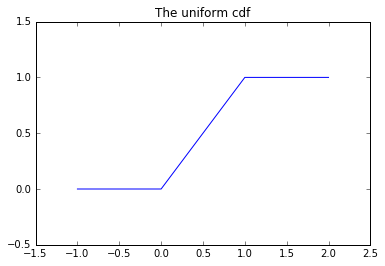

In [3]:
def uniform_cdf(x):
    if x < 0: return 0   # never less than 0
    elif x < 1: return x # P(x<0.4) = 0.4
    else: return 1 # always less than 1
    
def plot_uniform_cdf():
    xs = [x/2 for x in range(-2,5)]
    plot_margin = 0.5
    plt.plot(xs,[uniform_cdf(x) for x in xs],'-')
    plt.title("The uniform cdf")
    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - plot_margin,
              x1 + plot_margin,
              y0 - plot_margin,
              y1 + plot_margin))
    plt.show()
    
plot_uniform_cdf()
    

# Normal Distribution



$ P(x) = \frac{1}{{\sigma \sqrt {2\pi }}}exp(-\frac{(x-\mu)^2}{2 \sigma^2}) $

$v \sim \mathcal{N} (m,\sigma^2)$

It is the classic bell **curve–shaped** distribution and is completely determined by two parameters: its mean μ (mu) and its standard deviation σ (sigma). The mean indicates where the bell is centered, and the standard deviation how “wide” it is.

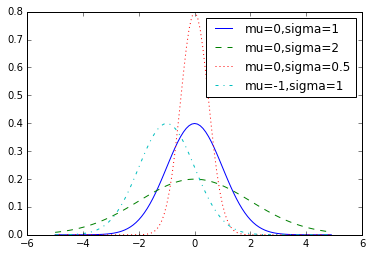

In [4]:
import scipy.stats

def normal_pdf(x, mu=0, sigma=1):
    #sqrt_two_pi = math.sqrt(2 * math.pi)
    #return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))
    # with scipy
    return scipy.stats.norm(mu, sigma).pdf(x)
    
def plot_normal_pdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()
    
plot_normal_pdfs()

When μ = 0 and σ = 1, it’s called the **standard normal distribution**. If Z is a standard
normal random variable, then it turns out that:

X = σZ + μ

is also normal but with **mean μ** and **standard deviation σ** . 

Conversely, if X is a normal random variable with mean μ and standard deviation σ ,

Z = X − μ /σ

is a standard normal variable.

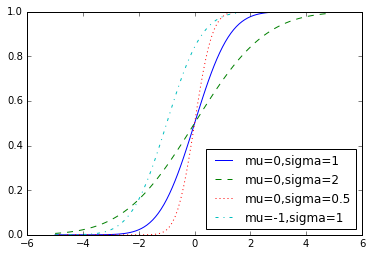

In [5]:
def normal_cdf(x, mu=0,sigma=1):    
    # return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
    # with scipy:
    return scipy.stats.norm(mu, sigma).cdf(x)


def plot_normal_cdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

plot_normal_cdfs()

In [6]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

# The central Limit Theorem

A random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

In particular, if x 1 , ..., x n are random variables with mean μ and standard deviation σ ,and if n is large, then:

$ \frac{1}{n} (x_{1}+x_{2} + ... + x_{n}) $

is **approximately normally distributed** with **mean μ** and **standard deviation σ/ n** .

Equivalently (but often more usefully),
$ \frac{(x_{1} + ... + x_{n}) − \mu n}{\sigma \sqrt{n}} $

is approximately normally distributed with mean 0 and standard deviation 1.

## Binomial 

In [7]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is p, and its standard deviation is $ \sqrt{ p(1 − p)} $ . The **central limit theorem** says that as n gets large, a Binomial(n,p) variable is approxi‐mately a normal random variable with mean μ = np and standard deviation
$ \sigma = \sqrt{np(1 − p)} $. If we plot both, you can easily see the resemblance;

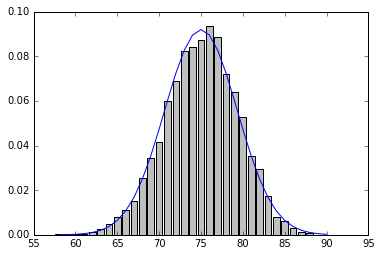

In [8]:
def make_hist(p, n, num_points):

    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()
    
make_hist(0.75, 100, 10000)